In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [31]:
df = pd.read_csv('cleaned.csv')
df.head()

,year,date,month,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,general_loc,time_caught,hour_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration_min,time_caught_bucket
0,2015,2015-08-27,8,65.0,76.3,8,nw,sunny,north of lockes,lockes,6:20,6,salmon,18.0,20.0,False,6:20,9:00,160.0,"[5, 7)"
1,2015,2015-08-27,8,65.0,76.3,8,nw,sunny,north of lockes,lockes,7:00,7,rainbow,16.0,20.0,False,6:20,9:00,160.0,"[7, 9)"
2,2015,2015-08-27,8,65.0,76.3,8,nw,sunny,north of lockes,lockes,7:15,7,smallmouth,12.8,20.0,False,6:20,9:00,160.0,"[7, 9)"
3,2015,2015-08-27,8,65.0,76.3,8,nw,sunny,north of lockes,lockes,8:40,8,salmon,10.0,37.0,False,6:20,9:00,160.0,"[7, 9)"
4,2015,2015-08-28,8,65.0,76.3,8,nw,sunny,north of diamond,diamond,7:45,7,rainbow,16.0,43.0,False,7:15,10:30,195.0,"[7, 9)"


In [32]:
df_caught = df.loc[df['fish_type'] != 'no_fish_caught']

In [44]:
df_caught['fish_length_in'] = df_caught['fish_length_in'].astype(float)

/var/folders/qp/clfzg_bn2wlgtrx99d36qsxw0000gn/T/ipykernel_10263/1456835098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caught['fish_length_in'] = df_caught['fish_length_in'].astype(float)


In [46]:
df_caught.dtypes

year                   object
date                   object
month                   int64
air_temp_f            float64
water_temp_f          float64
wind_speed_mph          int64
wind_dir               object
weather                object
location               object
general_loc            object
time_caught            object
hour_caught             int64
fish_type              object
fish_length_in        float64
water_depth_ft         object
skunked                  bool
lines_in               object
lines_out              object
duration_min          float64
time_caught_bucket     object
dtype: object

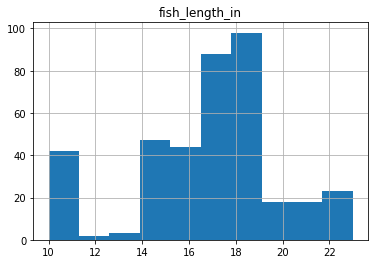

In [48]:
df_caught.hist('fish_length_in');

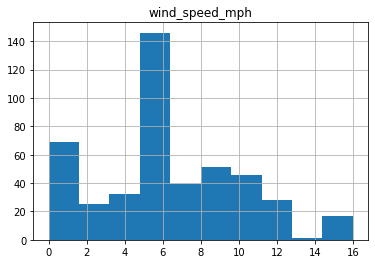

In [49]:
df.hist('wind_speed_mph');

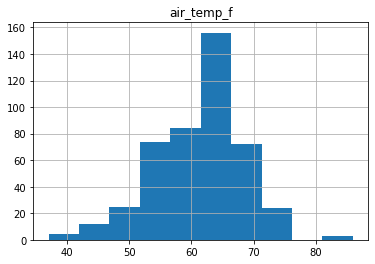

In [50]:
df.hist('air_temp_f');

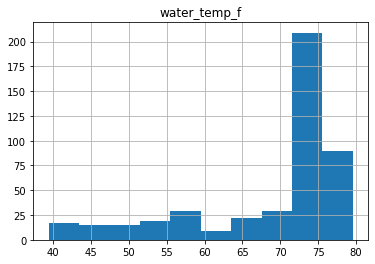

In [51]:
df.hist('water_temp_f');

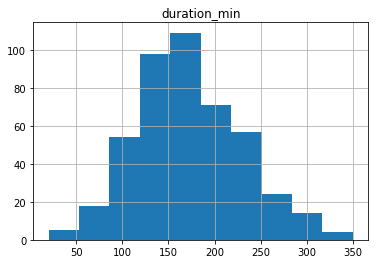

In [57]:
df.hist('duration_min');

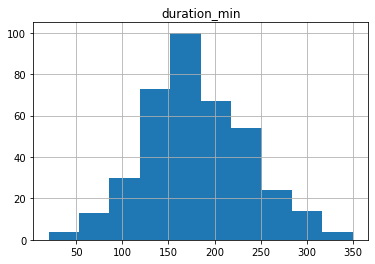

In [56]:
df_caught.hist('duration_min');

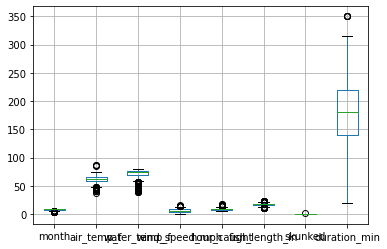

In [55]:
df_caught.boxplot();

In [89]:
df.groupby(df['general_loc'])['fish_type'].count().sort_values(ascending=False)

general_loc
diamond            123
welch              121
lockes              63
harilla bay         36
sandy               19
witches             18
saunders bay        17
little bear bay     13
alton bay           13
governors            7
rattlesnake          4
timber               3
wolfboro bay         3
varney               2
varney point         2
weirs marina         2
carr point           2
birch                2
spindle point        1
long island          1
tip witches          1
6 mile               1
Name: fish_type, dtype: int64

In [90]:
df_caught.groupby(df_caught['general_loc'])['fish_type'].count().sort_values(ascending=False)

general_loc
diamond            110
welch               97
lockes              54
harilla bay         31
sandy               18
witches             16
saunders bay        13
alton bay           10
little bear bay     10
governors            5
rattlesnake          3
wolfboro bay         3
birch                2
timber               2
varney               2
weirs marina         2
carr point           2
long island          1
tip witches          1
varney point         1
Name: fish_type, dtype: int64